## Load the training dataset

In [1]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ModuleNotFoundError: No module named 'pydrive'

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1lt4BnjaC7XGl0c7D1iowlY3KjglvwQas'

download1 = drive.CreateFile({'id': file_id_1})

# Download the file to a local disc
download1.GetContentFile('data_file.csv')

## Preprocessing and imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
import joblib

warnings.filterwarnings(action="ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("/content/data_file.csv")

# Preprocess the data
# Drop unnecessary columns
df.drop(['FileName', 'md5Hash'], axis=1, inplace=True)
df.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             62485 non-null  int64
 1   DebugSize           62485 non-null  int64
 2   DebugRVA            62485 non-null  int64
 3   MajorImageVersion   62485 non-null  int64
 4   MajorOSVersion      62485 non-null  int64
 5   ExportRVA           62485 non-null  int64
 6   ExportSize          62485 non-null  int64
 7   IatVRA              62485 non-null  int64
 8   MajorLinkerVersion  62485 non-null  int64
 9   MinorLinkerVersion  62485 non-null  int64
 10  NumberOfSections    62485 non-null  int64
 11  SizeOfStackReserve  62485 non-null  int64
 12  DllCharacteristics  62485 non-null  int64
 13  ResourceSize        62485 non-null  int64
 14  BitcoinAddresses    62485 non-null  int64
 15  Benign              62485 non-null  int64
dtypes: int64(16)
memory usage: 7.6 MB


In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Machine', 'MajorOSVersion', 'BitcoinAddresses'])

# Split features and target
X = df.drop('Benign', axis=1)
y = df['Benign']

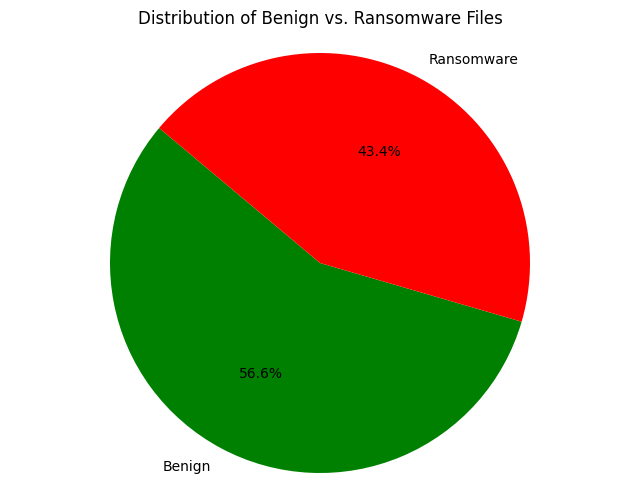

In [ ]:
class_counts = df['Benign'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
labels = ['Benign', 'Ransomware']
colors = ['green', 'red']
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140 ,colors=colors)
plt.title('Distribution of Benign vs. Ransomware Files')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Random Forest Classifier

In [ ]:
# # Split dataset into features and target
# X = df.iloc[:, 1:-1]
# y = df.iloc[:, -1]

# Generate random classification data
# X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=90, random_state=1)

# Fit the Random Forest Classifier to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top k features (e.g., top 5)
top_k = 25
selected_features_indices = sorted_indices[:top_k]

# Concatenate selected features with the target variable
selected_features_with_labels = pd.concat([X.iloc[:, selected_features_indices], y], axis=1)

# Save the selected features data along with the correct class labels to a new CSV file
selected_features_with_labels.to_csv('selected_features_data.csv', index=False)

# Get the names of selected features
selected_features = X.columns[selected_features_indices]

# Print selected feature names
print("Selected Features:")
print(selected_features)

# Use selected features for training and testing
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Fit the Random Forest Classifier with selected features
rf.fit(X_train_selected, y_train)

# Save the trained model to a file after training with selected features
joblib.dump(rf, 'random_forest_model.pkl')

# Predict the classes of the testing set with selected features
y_pred_selected = rf.predict(X_test_selected)

# Print the accuracy of the model with selected features
accuracy_selected = rf.score(X_test_selected, y_test_rf)
print("Accuracy with Selected Features:", "{:.4f}".format(accuracy_selected))

Selected Features:
Index(['DllCharacteristics', 'DebugSize', 'MajorLinkerVersion', 'DebugRVA',
       'ResourceSize', 'Machine_34404', 'SizeOfStackReserve', 'Machine_332',
       'NumberOfSections', 'IatVRA', 'MajorImageVersion', 'MajorOSVersion_6',
       'MajorOSVersion_5', 'ExportSize', 'MajorOSVersion_10',
       'MinorLinkerVersion', 'ExportRVA', 'MajorOSVersion_4',
       'BitcoinAddresses_1', 'BitcoinAddresses_0', 'MajorOSVersion_13',
       'MajorOSVersion_8', 'MajorOSVersion_9', 'MajorOSVersion_1',
       'MajorOSVersion_7'],
      dtype='object')
Accuracy with Selected Features: 0.9971


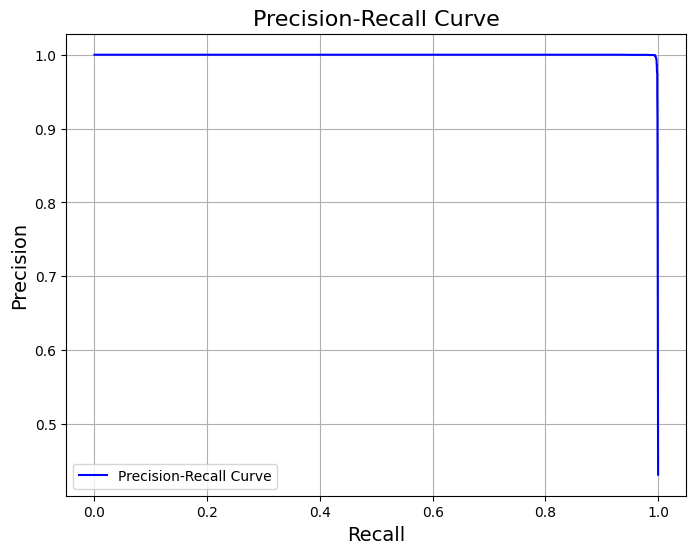

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_rf, rf.predict_proba(X_test_selected)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()


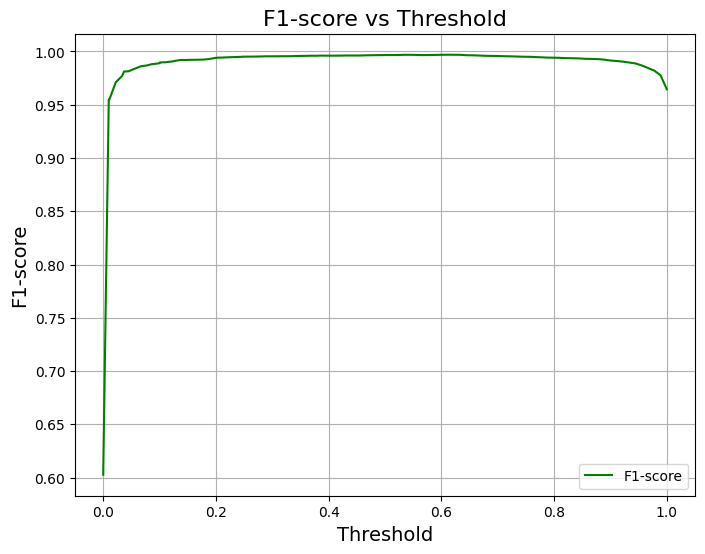

In [ ]:
# Calculate F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot F1-score vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1-score', color='green')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.title('F1-score vs Threshold', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()


Confusion Matrix:
[[7096   11]
 [  25 5365]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00      5390

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



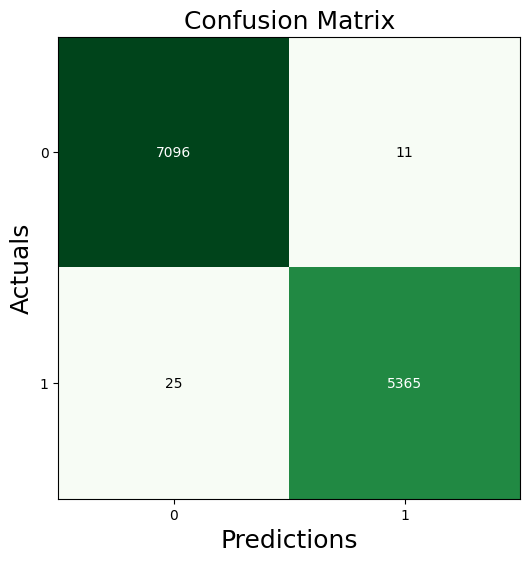

In [ ]:
# Use the model to predict the classes of the testing set
y_pred = rf.predict(X_test_selected)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cm=confusion_matrix(y_test_rf, y_pred)
print(cm)

print("\n Classification Report:")
classr=classification_report(y_test_rf, y_pred,digits=4)
print(classification_report(y_test_rf, y_pred))
fig, ax = plot_confusion_matrix(conf_mat=cm , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Perform cross-validation with 10 folds
scores = cross_val_score(rf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.9943991  0.99487918 0.99503921 0.99727956 0.99695951 0.99551857
 0.99535851 0.99743918 0.99631882 0.99663892]
Mean Cross-Validation Score: 0.9959830576733507


## XGBoost classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv("/content/data_file.csv")

# Preprocess the data
# Drop unnecessary columns
df.drop(['FileName', 'md5Hash'], axis=1, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Machine', 'MajorOSVersion', 'BitcoinAddresses'])

# Split features and target
X = df.drop('Benign', axis=1)
y = df['Benign']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create XGBoost classifier
xgb_model = XGBClassifier()

# Fit XGBoost classifier to the training data
xgb_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = xgb_model.predict(X_test)

# Save the trained model to a file
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", "{:.4f}".format(accuracy))



Accuracy: 0.9961


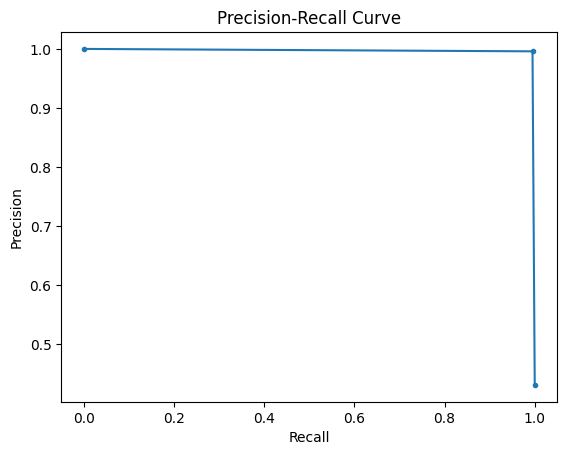

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


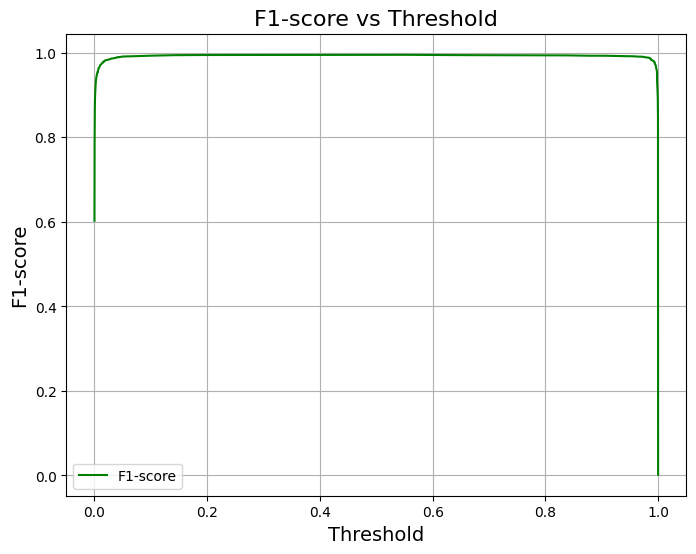

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot F1-score vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1-score', color='green')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.title('F1-score vs Threshold', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()


Accuracy: 0.9961058359116611
Confusion Matrix:
[[10628    33]
 [   40  8045]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10661
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     18746
   macro avg       1.00      1.00      1.00     18746
weighted avg       1.00      1.00      1.00     18746



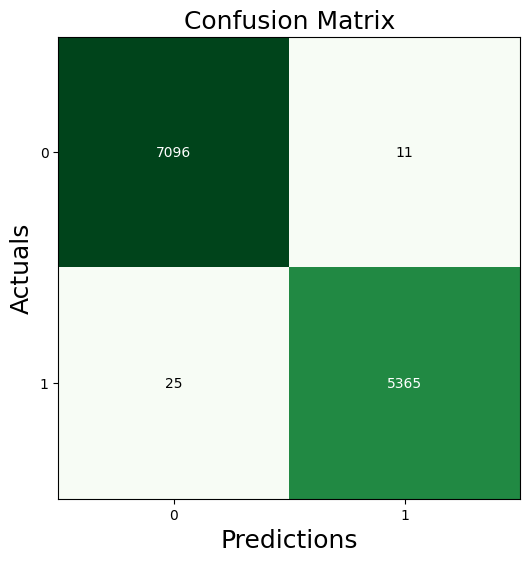

In [ ]:
# Calculate accuracy
accuracyx = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracyx)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cmx = confusion_matrix(y_test, y_pred)
print(cmx)

classx=classification_report(y_test, y_pred,digits=5)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
import numpy as np

# Define selected features
selected_features = X.columns.tolist()  # Use all features for now

# Perform cross-validation with 10 folds
scoresx = cross_val_score(xgb_model, X[selected_features], y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", scoresx)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", np.mean(scoresx))


Cross-Validation Scores: [0.9943991  0.993759   0.99551928 0.99743959 0.99599936 0.99519846
 0.99535851 0.99871959 0.99631882 0.99647887]
Mean Cross-Validation Score: 0.9959190602378583


## Comparison of RandomForest and XGBoost classifier

Comparison of Metrics:
                Algorithm  Accuracy  Precision    Recall  F1-score
0  RandomForestClassifier  0.997119   0.997954  0.995362  0.996656
1           XGBClassifier  0.996106   0.995915  0.995053  0.995484


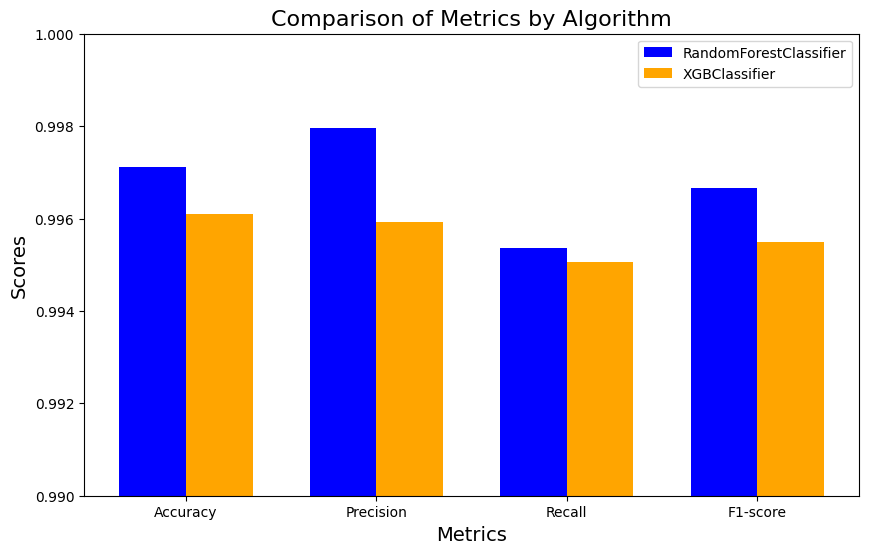

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data for RandomForestClassifier
rf_accuracy = accuracy_selected
rf_precision = precision_score(y_test_rf, y_pred_selected)
rf_recall = recall_score(y_test_rf, y_pred_selected)
rf_f1 = f1_score(y_test_rf, y_pred_selected)

# Predict the classes of the testing set with XGBClassifier
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics for XGBClassifier
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

# Creating a DataFrame to compare metrics
data = {
    'Algorithm': ['RandomForestClassifier', 'XGBClassifier'],
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'Precision': [rf_precision, xgb_precision],
    'Recall': [rf_recall, xgb_recall],
    'F1-score': [rf_f1, xgb_f1]
}

metrics_df = pd.DataFrame(data)

# Displaying the comparison table
print("Comparison of Metrics:")
print(metrics_df)

# Creating a bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
xgb_metrics = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0.99, 1.0)
rects1 = ax.bar(x - width/2, rf_metrics, width, label='RandomForestClassifier', color='blue')
rects2 = ax.bar(x + width/2, xgb_metrics, width, label='XGBClassifier', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of Metrics by Algorithm', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## Artificial Neural Network classifier

Epoch 1/200
1250/1250 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.9072 - val_loss: 0.1404 - val_accuracy: 0.9557
Epoch 2/200
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1605 - accuracy: 0.9500 - val_loss: 0.1027 - val_accuracy: 0.9683
Epoch 3/200
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1296 - accuracy: 0.9609 - val_loss: 0.0905 - val_accuracy: 0.9732
Epoch 4/200
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1209 - accuracy: 0.9647 - val_loss: 0.0858 - val_accuracy: 0.9749
Epoch 5/200
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1131 - accuracy: 0.9680 - val_loss: 0.0808 - val_accuracy: 0.9787
Epoch 6/200
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1047 - accuracy: 0.9702 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 7/200
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1027 - accuracy: 0.9710 - val_loss: 0.0758 - val_ac

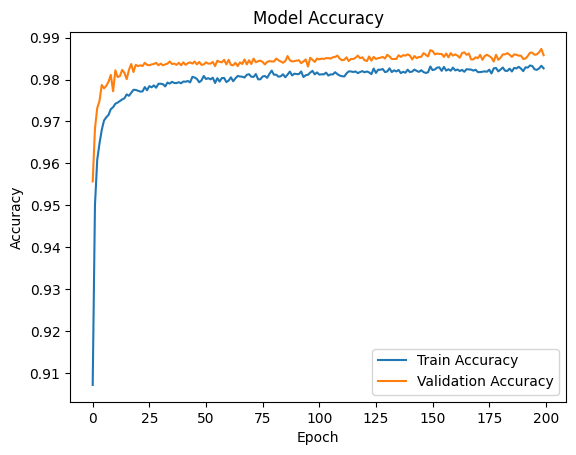

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/data_file.csv")

# Drop the unnecessary columns
df.drop(['FileName', 'md5Hash'], axis=1, inplace=True)

# # Convert categorical columns to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['Machine', 'MajorOSVersion', 'BitcoinAddresses'])

# Split features and target
X = df.drop('Benign', axis=1)
y = df['Benign']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Save the trained model
model.save("dnn_model")

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




## Download Saved Models

In [ ]:
# Download the processed video/Images
import os
import zipfile
from google.colab import files

# Create some sample files (replace this with your actual file paths)
file_paths = ['/content/random_forest_model.pkl','/content/xgboost_model.pkl']

# Zip the files
zip_file_path = '/content/model_files.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for file_path in file_paths:
        zipf.write(file_path, os.path.basename(file_path))

# Download the zip file
files.download(zip_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/random_forest_model.pkl'

In [ ]:
import zipfile
import os

# Define the folder you want to zip
folder_to_zip = "/content/dnn_model"

# Zip the folder
zip_filename = folder_to_zip + ".zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_to_zip):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_to_zip))

# Download the zipped file
from google.colab import files
files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load Saved Models

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_2 = '1ur7qyO9IOnqBwG7kwys7sfkwXocUm5NZ'
file_id_3 = '1f-1hsJKjL4Enlvdsv4f48iWB8FW5I0ZU'

download2 = drive.CreateFile({'id': file_id_2})
download3 = drive.CreateFile({'id': file_id_3})

# Download the file to a local disc
download2.GetContentFile('dnn_model.zip')
download3.GetContentFile('model_files.zip')

In [ ]:
!unzip dnn_model.zip -d /content/dnn_model

Archive:  dnn_model.zip
  inflating: /content/dnn_model/keras_metadata.pb  
  inflating: /content/dnn_model/fingerprint.pb  
  inflating: /content/dnn_model/saved_model.pb  
  inflating: /content/dnn_model/variables/variables.data-00000-of-00001  
  inflating: /content/dnn_model/variables/variables.index  


In [ ]:
!unzip model_files.zip -d /content/model_files

Archive:  model_files.zip
 extracting: /content/model_files/random_forest_model.pkl  
 extracting: /content/model_files/xgboost_model.pkl  


## Load New Dataset for Random Forest

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import os

# Specify the directory name
directory = '/content/new_data_files'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("Directory created successfully.")
else:
    print("Directory already exists.")


Directory already exists.


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_4 = '1BNsc_06Fb3g10S3blJ6FrWXmPuJt0P5w'

download4 = drive.CreateFile({'id': file_id_4})

# Download the file to a local disc
download4.GetContentFile('/content/new_data_files/selected_features_data.csv')

**Run below cell only if you want to upload new csv data. Ensure that the data has all required feature columns.**

In [ ]:
from google.colab import files
import pandas as pd

# Prompt the user to upload a file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Check if the uploaded file has a CSV extension
if not file_name.lower().endswith('.csv'):
    raise ValueError("File format not supported. Please upload a CSV file.")

# Load the uploaded CSV file into a DataFrame
new_data = pd.read_csv(file_name)

# Display the DataFrame
print("Uploaded CSV file contents:")
print(new_data.head())

Saving selected_features_data.csv to selected_features_data (1).csv
Uploaded CSV file contents:
   DllCharacteristics  DebugSize  MajorLinkerVersion  DebugRVA  ResourceSize  \
0               34112          0                   8         0           672   
1               16864         84                  14    121728          1024   
2               34112          0                   8         0           672   
3               16736         84                  14     19904          1040   
4               16736         84                  14     97728          1096   

   Machine_34404  SizeOfStackReserve  Machine_332  NumberOfSections  IatVRA  \
0          False             1048576         True                 3    8192   
1           True              262144        False                 8       0   
2          False             1048576         True                 3    8192   
3           True              262144        False                 6   18160   
4           True            

## Ransomware Classification on Unseen Data - Random Forest

In [ ]:
import joblib
import pandas as pd

# Load the saved RandomForest model
loaded_model = joblib.load('/content/model_files/random_forest_model.pkl')

# Load new data for inference
new_data = pd.read_csv('/content/selected_features_data.csv') # if you have uploaded data manually, please comment this line

original_class = new_data['Benign']

# Preprocess the new data
new_data.drop(['Benign'], axis=1, inplace=True)

# Perform inference on the new data
X_new = new_data

# Predict the classes of the new data
predictions = loaded_model.predict(X_new)

accuracy_selected = loaded_model.score(X_new, original_class)

# Print the predictions
print("Predictions:", predictions)
print("Accuracy with Selected Features:", "{:.4f}".format(accuracy_selected))


Predictions: [1 1 1 ... 0 0 0]
Accuracy with Selected Features: 0.9992


## Load New Dataset for XGBoost and ANN

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import os

# Specify the directory name
directory = '/content/new_data_files'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("Directory created successfully.")
else:
    print("Directory already exists.")


Directory already exists.


In [ ]:
import os

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_5 = '1lt4BnjaC7XGl0c7D1iowlY3KjglvwQas'

download5 = drive.CreateFile({'id': file_id_5})

# Download the file to a local disc
download5.GetContentFile('/content/new_data_files/data_file.csv')

# Rename the downloaded file
os.rename('/content/new_data_files/data_file.csv', '/content/new_data_files/data_new_xg_ann.csv')

**Run below code snippet only if you want to upload data manually. Ensure that the data has all feature columns which are required.**

In [ ]:
from google.colab import files
import pandas as pd

# Prompt the user to upload a file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Check if the uploaded file has a CSV extension
if not file_name.lower().endswith('.csv'):
    raise ValueError("File format not supported. Please upload a CSV file.")

# Load the uploaded CSV file into a DataFrame
new_data = pd.read_csv(file_name)

# Display the DataFrame
print("Uploaded CSV file contents:")
print(new_data.head())

## Ransomware Classification on Unseen Data - XGBoost

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

# Load the saved XGBoost model
xgb_model = joblib.load('/content/model_files/xgboost_model.pkl')

# Load the new data
new_data = pd.read_csv("/content/new_data_files/data_new_xg_ann.csv")  # if you have uploaded data manually please comment out this line

# Preprocess the new data in a similar way as the training data
new_data.drop(['FileName', 'md5Hash'], axis=1, inplace=True)
new_data = pd.get_dummies(new_data, columns=['Machine', 'MajorOSVersion', 'BitcoinAddresses'])

# Assuming 'Benign' column is the target variable in the new data
X_new = new_data.drop('Benign', axis=1)
y_true_new = new_data['Benign']

# Predict the classes of the new data
y_pred_new = xgb_model.predict(X_new)

# Print or use the predictions as needed
print("Predictions for new data:", y_pred_new)

# Calculate the accuracy
accuracy_new = accuracy_score(y_true_new, y_pred_new)
print("Accuracy on new data:", "{:.4f}".format(accuracy_new))


Predictions for new data: [1 1 1 ... 0 0 0]
Accuracy on new data: 0.9981


## Ransomware Classification on Unseen Data - ANN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the new data
new_data = pd.read_csv("/content/new_data_files/data_new_xg_ann.csv")  # Comment out if you have manually uploaded data

# Drop unnecessary columns
new_data.drop(['FileName', 'md5Hash'], axis=1, inplace=True)

# Split features and target
X_new = new_data.drop('Benign', axis=1)
y_new = new_data['Benign']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardize features using the same scaler used for training data
X_new_scaled = scaler.transform(X_new)

# Load the saved model
model = tf.keras.models.load_model("/content/dnn_model")

# Predictions on the new data
y_pred_new = (model.predict(X_new_scaled) > 0.5).astype("int32")

# Evaluate the model on the new data
loss_new, accuracy_new = model.evaluate(X_new_scaled, y_new)
print(f"New Data Loss: {loss_new}, New Data Accuracy: {accuracy_new}")

# Classification report and confusion matrix for the new data
print("Classification Report for New Data:")
print(classification_report(y_new, y_pred_new))
cm_new = confusion_matrix(y_new, y_pred_new)
print("Confusion Matrix for New Data:")
print(cm_new)


1953/1953 [==============================] - 5s 2ms/step - loss: 0.0462 - accuracy: 0.9858
New Data Loss: 0.04621842876076698, New Data Accuracy: 0.9858046174049377
Classification Report for New Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35367
           1       0.98      0.98      0.98     27118

    accuracy                           0.99     62485
   macro avg       0.99      0.99      0.99     62485
weighted avg       0.99      0.99      0.99     62485

Confusion Matrix for New Data:
[[34925   442]
 [  445 26673]]
